In [1]:
# Assignment 3
# Determining and removing drawbacks of exponential and running mean.
# Team 2:
#     Ekaterina Karmanova
#     Timur Chikichev
#     Iaroslav Okunevich
#     Nikita Mikhailovskiy
#
# Skoltech, 04.10.2019

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
#Assigment 3
#Part 1
# Array with 𝜎𝑤2 and 𝜎𝜂2
sigmasTrue=[28,97]
#w-normally distributed random noise with zero mathematical expectation and variance =9.
w300= np.random.normal(0, np.sqrt(sigmasTrue[0]), 300)
#TrueTrajectory() - generate true trajectory.
def TrueTrajectory(size,w):
        array=np.zeros((size))
        array[0]=10
        for i in range(1,size):
                array[i]=array[i-1]+w[i]
        return array

sigmasTrue=[28,97]
w300= np.random.normal(0, sigmasTrue[0], 300)
x300=TrueTrajectory(300,w300)

In [4]:
def Measurements(x,ny):
        z=np.zeros(len(x))
        for i in range(0, len(x)):
            z[i]=x[i]+ny[i]
        return z

ny300= np.random.normal(0, sigmasTrue[1], 300)
z300=Measurements(x300,ny300)

In [6]:
def Alfa(sigma):
    psi=sigma[0]**2/sigma[1]**2
    return (-psi+np.sqrt(psi**2+4*psi))/2
alf=Alfa(sigmasTrue)
print('Optimal smoothing coefficient=',alf)

Optimal smoothing coefficient= 0.24998861233121078


In [7]:
def Expsmoothing(alfa,z):
    array=np.zeros(len(z))
    array[0]=10
    for i in range(1,len(z)):
                array[i]=array[i-1]+alfa*(z[i]-array[i-1])    
    return array

exp300=Expsmoothing(alf,z300)

In [8]:
def FindWind(alfa):    
    return round((2-alfa)/alfa)

def RunningMean(z,m):
    x=np.zeros(len(z))
    sumFirst=0
    sumLast=0
    step=int((m-1)/2)
    for i in range(0,step):
        sumFirst+=z[i]
        sumLast+=z[len(z)-i-1]
    for i in range(step,len(z)-step):
        for j in range(i-step,i+step+1):
            x[i]+=z[j]
        x[i]/=m
    for i in range(0,step):
        x[i]=sumFirst/step
        x[len(x)-i-1]=sumLast/step
    return x

wind=FindWind(alf)
r300=RunningMean(z300,wind)

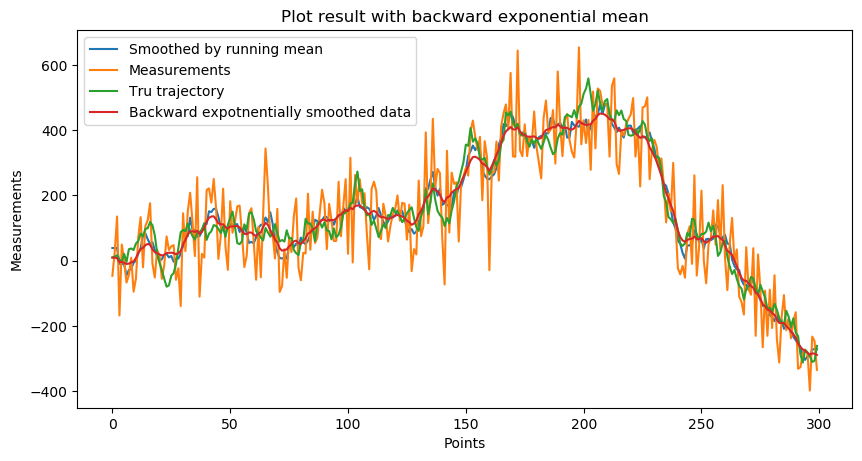

In [15]:
#BackExpSmoothing - backward exponential smoothing.
def BackExpSmoothing(alfa,exp):
    array=np.zeros(len(exp))
    array[len(exp)-1]=exp[len(exp)-1]
    for i in range(len(exp)-2,-1,-1):
                array[i]=array[i+1]+alfa*(exp[i]-array[i+1])    
    return array

bexp300=BackExpSmoothing(alf,exp300)
figure(num=None, figsize=(10, 5), dpi=100, facecolor='w', edgecolor='k')
plt.title('Plot result with backward exponential mean')
plt.ylabel('Measurements')
plt.xlabel('Points')
plt.plot(r300,label='Smoothed by running mean')
plt.plot(z300,label='Measurements')
plt.plot(x300,label='Tru trajectory')
plt.plot(bexp300,label='Backward expotnentially smoothed data')
plt.legend()
plt.show()  

In [18]:
#1.3 
#DevInd() - find deviation and variability indicators.
def DevVarInd(z,x):  
    Id=[0,0]
    for i in range(0,len(z)):
                Id[0]+=(z[i]-x[i])**2    
    for i in range(0,len(z)-2):
                Id[1]+=(x[i+2]-2*x[i+1]+x[i])**2          
    return Id

indTru=DevVarInd(z300,x300)
print('Indicator tru trajectory:\n',indTru)

indEx=DevVarInd(z300,exp300)
print('Indicator forward expotnentially smoothing:\n',indEx)

indBex=DevVarInd(z300,bexp300)
print('Indicator backward expotnentially smoothing:\n',indBex)

indR=DevVarInd(z300,r300)
print('Indicator running smoothing:\n',indR)

indZ=DevVarInd(z300,z300)
print('Indicator measurements:\n',indZ)

Indicator tru trajectory:
 [2700753.3176758196, 440801.5703051666]
Indicator forward expotnentially smoothing:
 [1932119.7701347356, 447626.1828054976]
Indicator backward expotnentially smoothing:
 [2232905.9806962316, 15466.797659052396]
Indicator running smoothing:
 [2288666.566987221, 238831.06025757067]
Indicator measurements:
 [0.0, 16746771.020446876]


In [20]:
#Part II
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

a= np.random.normal(0, np.sqrt(10), 300)
ny=np.random.normal(0, np.sqrt(500), 300)

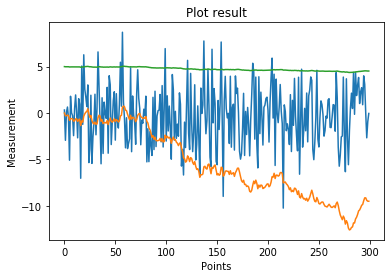

In [21]:
def Trajectory(size,acc,t):
        vel=np.zeros((size))
        vel[0]=0
        trajectory=np.zeros((size))
        trajectory[0]=5
        for i in range(1,size):
                vel[i]=vel[i-1]+acc[i]*t
        for i in range(1,size):
                trajectory[i]=trajectory[i-1]+acc[i]*t*t/2
        plt.title('Plot result')
        plt.ylabel('Measurement')
        plt.xlabel('Points')
        plt.plot(acc,label='Acceleration')
        plt.plot(vel,label='Velosity')
        plt.plot(trajectory,label='Trajectory')
        return trajectory

traject=Trajectory(300,a,0.1)

In [22]:
z=np.zeros(len(traject))
for i in range(1,len(traject)):
                z[i]=traject[i]+ny[i]

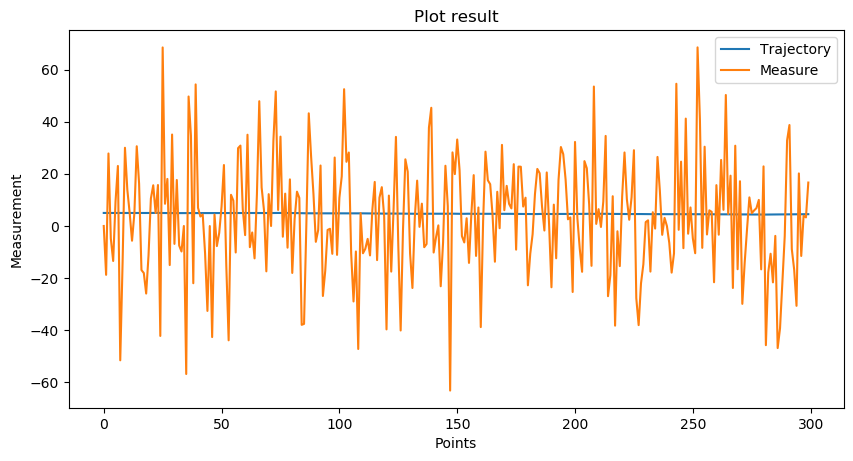

In [24]:
figure(num=None, figsize=(10, 5), dpi=100, facecolor='w', edgecolor='k')
plt.title('Plot result')
plt.ylabel('Measurement')
plt.xlabel('Points')
plt.plot(traject,label='Trajectory')
plt.plot(z,label='Measure')
plt.legend()
plt.show() 

M=10,I= [128756.69763332284, 5601.911259366261]
M=20,I= [140876.53139236782, 1611.6731986328446]
M=30,I= [136370.8287971321, 562.8832426701789]
M=40,I= [138361.88051600257, 369.57897431281845]
M=50,I= [141194.56853642128, 287.0195321821465]


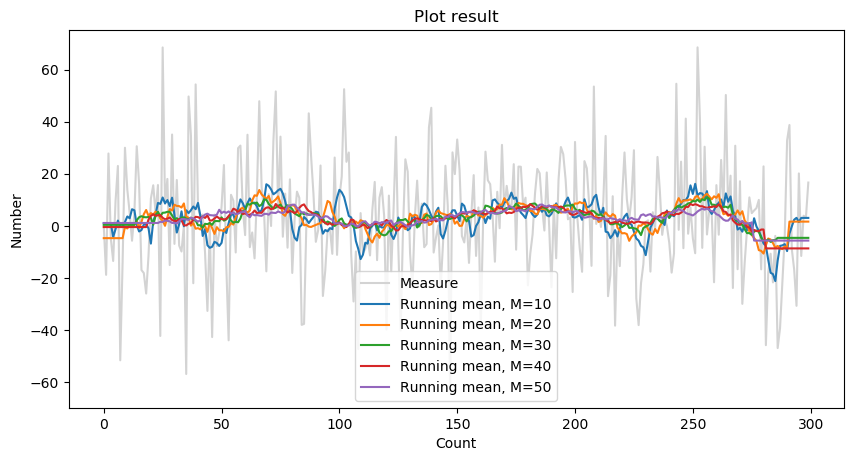

In [29]:
def FindingWindow(z,step):
    figure(num=None, figsize=(10, 5), dpi=100, facecolor='w', edgecolor='k')
    plt.plot(z,label='Measure',c='lightgrey')
    for i in range(step,60,step):
        r=RunningMean(z,i)
        plt.plot(r,label='Running mean, M={}'.format(i))
        print('M={},Ind='.format(i),DevVarInd(z,r))
    plt.title('Plot result')
    plt.ylabel('Number')
    plt.xlabel('Count')    
    plt.legend()
    plt.show() 
        
FindingWindow(z,10)

Alpha=0.0,Ind= [157201.88488843731, 0.0]
Alpha=0.25,Ind= [92683.90358514375, 22102.10137711727]
Alpha=0.5,Ind= [47373.19613217184, 114222.9006936296]
Alpha=0.75,Ind= [14048.410205405968, 338427.9773019121]


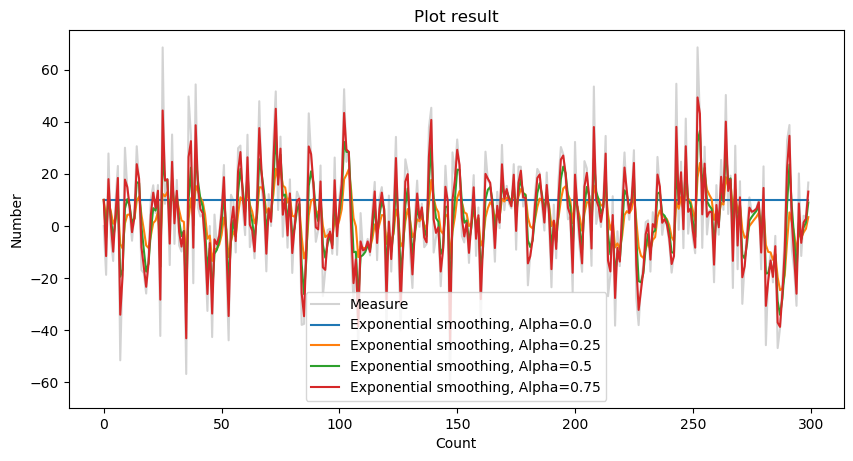

In [53]:
def FindingAlpha(z,step):
    figure(num=None, figsize=(10, 5), dpi=100, facecolor='w', edgecolor='k')
    plt.plot(z,label='Measure',c='lightgrey')
    for i in range(int(1/step)):
        exp=Expsmoothing(i*step,z)
        plt.plot(exp,label='Exponential smoothing, Alpha={}'.format(i*step))
        print('Alpha={},Ind='.format(i*step),DevVarInd(z,exp))
    plt.title('Plot result')
    plt.ylabel('Number')
    plt.xlabel('Count')    
    plt.legend()
    plt.show() 
        
FindingAlpha(z,0.25)

M=10,I= [115828.80556118506, 5423.517371098558]
M=20,I= [136612.18540439848, 1040.8868646255307]
M=30,I= [139321.10056987984, 488.67658518795815]


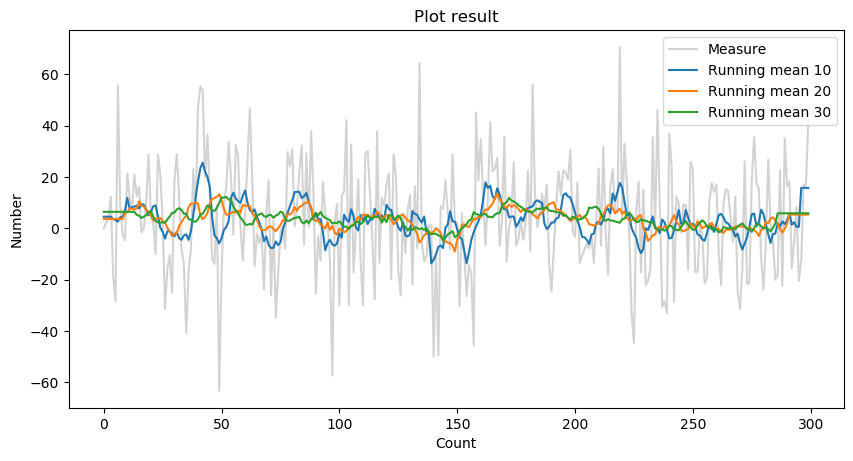

a: 15 res: 105181759.6342415
a: 18 res: 108421375.9556352
a: 21 res: 110725738.3975149
a: 24 res: 110641731.45541748
a: 27 res: 112453599.39144626
a: 30 res: 111798954.06553544
a: 33 res: 111149375.08963022
a: 36 res: 111118162.56612393
a: 39 res: 110672982.78154445
a: 42 res: 111161903.75170512
a: 45 res: 111254088.59999722
a: 48 res: 110701320.70803028
a: 51 res: 109500048.11785038
a: 54 res: 109684577.26435155
a: 57 res: 110405598.74206129
a: 60 res: 110779672.76482734
a: 63 res: 111009877.00082433
M=10,I= [136612.18540439848, 1040.8868646255307]
M=20,I= [115828.80556118506, 5423.517371098558]


In [88]:
figure(num=None, figsize=(10, 5), dpi=100, facecolor='w', edgecolor='k')
plt.title('Plot result')
plt.ylabel('Number')
plt.xlabel('Count')
plt.plot(z,label='Measure',c='lightgrey')
#plt.plot(traject,label='Trajectory')

def plot_r(n):
    r=runningMean(z,n)
    plt.plot(r,label='Running mean {}'.format(n))
    print('M={},I='.format(n),devInd(z,runningMean(z,n)))

plot_r(10)
plot_r(20)
plot_r(30)


plt.legend()
plt.show() 
# a = [ for i in range(50)]

a = [i for i in range(15, 65, 3)]

#b = [400, 800]
b= [800, 700]
c = []
krits = []
for ai in a:
    ki = devInd(z,runningMean(z,ai))
    res = np.sum([ki[i]*b[i] for i in range(2)])

    krits.append(res)
    print('a: {} res: {}'.format(ai, res))

    
print('M=10,I=',devInd(z,runningMean(z,20)))
print('M=20,I=',devInd(z,runningMean(z,10)))

In [ ]:
figure(num=None, figsize=(10, 5), dpi=100, facecolor='w', edgecolor='k')
plt.title('Plot result')
plt.ylabel('Number')
plt.xlabel('Count')
plt.plot(z,label='Measure',c='lightgrey')
#plt.plot(traject,label='Trajectory')

def plot_e(n):
    r=runningMean(z,n)
    plt.plot(r,label='Running mean {}'.format(n))
    print('M={},I='.format(n),devInd(z,runningMean(z,n)))

plot_r(10)
plot_r(20)
plot_r(30)


plt.legend()
plt.show() 
print('M=10,I=',devInd(z,runningMean(z,20)))
print('M=20,I=',devInd(z,runningMean(z,10)))

In [60]:
#Second trajectory, 4
def Trajectory(size,w,t):
        a=np.zeros((size))
        a[0]=1
        trajectory=np.zeros((size))
        trajectory[0]=5
        omega=2*np.pi/t
        
        for i in range(1,size):
                a[i]=a[i-1]+w[i]
        for i in range(0,size):
                trajectory[i]=a[i]*np.sin(omega*i+3)        
        return trajectory

w= np.random.normal(0, 0.08, 200)
traject=Trajectory(200,w,32)

In [61]:
#4
ny= np.random.normal(0, np.sqrt(0.05), 200)
z=Measurements(traject,ny)

In [63]:
#5
r=RunningMean(z,13)

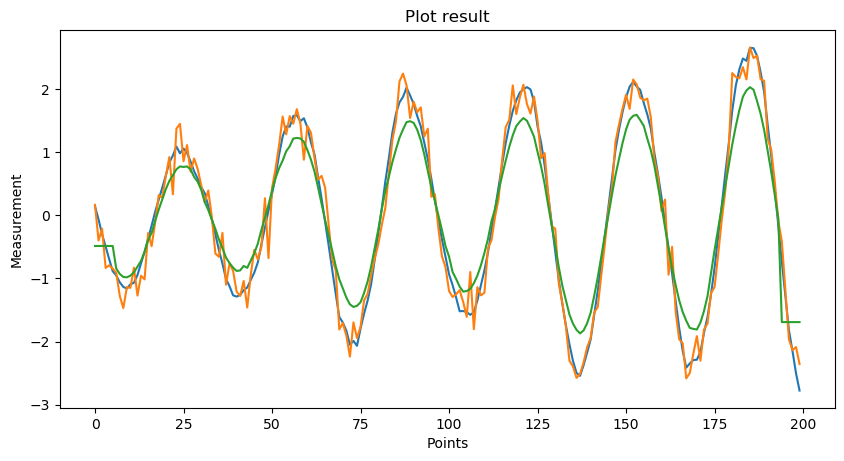

In [64]:
figure(num=None, figsize=(10, 5), dpi=100, facecolor='w', edgecolor='k')
plt.title('Plot result')
plt.ylabel('Measurement')
plt.xlabel('Points')
plt.plot(traject,label='Trajectory')
plt.plot(z,label='Measurements')
plt.plot(r,label='Running mean')

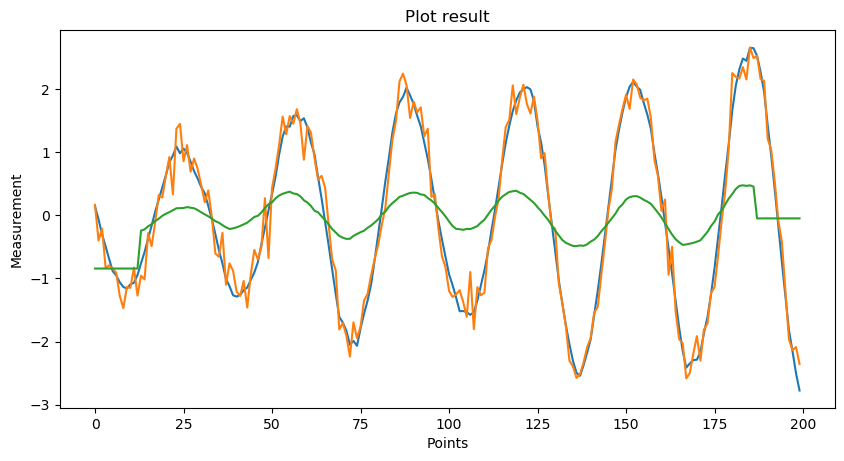

In [73]:
r=RunningMean(z,27)
figure(num=None, figsize=(10, 5), dpi=100, facecolor='w', edgecolor='k')
plt.title('Plot result')
plt.ylabel('Measurement')
plt.xlabel('Points')
plt.plot(traject,label='Trajectory')
plt.plot(z,label='Measurements')
plt.plot(r,label='Running mean')